<a href="https://colab.research.google.com/github/mac-raj/Digit_Recognition/blob/main/digitrec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

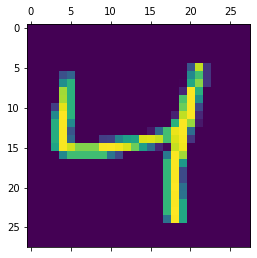

In [ ]:
plt.matshow(x_train[2])

In [ ]:
y_train[2]

4

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train =x_train/255
x_test = x_test/255

In [ ]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [ ]:
x_train_flattened.shape

(60000, 784)

In [ ]:
x_test_flattened.shape

(10000, 784)

In [ ]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model=keras.Sequential(
 [
     keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
  ]
)
model.compile(
    optimizer ='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4693 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3044 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9245
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9259


In [ ]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2672 - accuracy: 0.9251


[0.267238587141037, 0.9251000285148621]

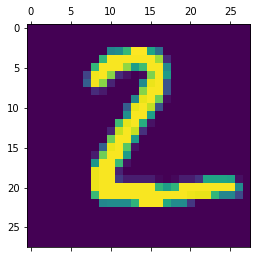

In [ ]:
plt.matshow(x_test[1])

In [ ]:
y_predicted=model.predict(x_test_flattened)
y_predicted[1]

array([2.6539099e-01, 6.1396663e-03, 9.9926955e-01, 3.3410904e-01,
       4.2827128e-10, 8.2188624e-01, 9.3275762e-01, 1.0148410e-12,
       1.3777749e-01, 2.0835056e-09], dtype=float32)

In [ ]:
np.argmax(y_predicted[1])

2

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    1,    2,    0,    6,   12,    3,    2,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   4,   14,  911,   18,    7,    6,   13,   11,   43,    5],
       [   1,    1,   14,  921,    0,   28,    3,   11,   22,    9],
       [   1,    1,    2,    2,  909,    0,   13,    5,    9,   40],
       [   7,    3,    2,   25,    9,  791,   16,    6,   27,    6],
       [   9,    3,    4,    1,    7,   12,  918,    2,    2,    0],
       [   1,    7,   20,    8,    7,    0,    0,  948,    2,   35],
       [   4,   12,    6,   22,    9,   31,    9,   11,  862,    8],
       [  10,    8,    1,   10,   27,    7,    0,   20,    6,  920]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

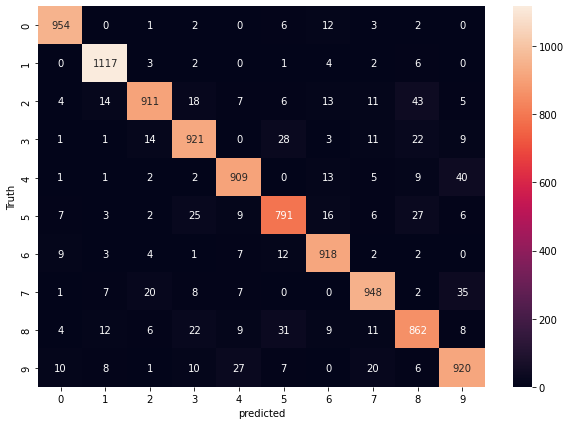

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
model =keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation ='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2675 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1227 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0857 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0660 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0515 - accuracy: 0.9839
